# Face Detection
## Unstructured Data Image proyect
### By
- Juan Miguel Ramos Pugnaire
- Juan Ortega Ortega
- Pablo Cardenal

All the code is [available on github](https://github.com/pcardenal5/FaceDetection). We have worked mainly on dev, only to merge to main at the end of the project.

### Objective

The aim of this project is to create a mock face detection software, in which an interface will be used to interact with the convolutional neural network we will train. It will be able to differentiate between five different classes:

- The three faces of all group members (quite a challenge, as we all have a beard and black hair!)
- A random face that does not belong to our group.
- An image without a face in it.

Once the objective is clear we can move on to the description of the project and the challenges we have faced.

The report and general workflow of the project has been structured in the following way:
## Project Index
<ol>
<li>Data Extraction</li>
<li>Interface development</li>
<li>Training & Test</li>
<li>Parameter Tuning</li>
<li>Results</li>
</ol>

### 1. Data Extraction 

Once the idea for the project was clear the first thing we had to do was getting a good quality dataset. Thankfully there is a plethora of datasets made for face detection and we decided to use the one made by Gwangbin Bae, Martin de La Gorce, et al. on their paper

> [DigiFace-1M: 1 Million Digital Face Images for Face Recognition](https://github.com/microsoft/DigiFace1M/raw/main/paper.pdf)

The dataset is available for download on [their github page](https://github.com/microsoft/DigiFace1M). As the title of the paper may suggest, this is an artificially generated dataset of faces in which they aim to reduce the problems of dataset crawled from the web. They sey those datasets "are severely biased (in terms of race, lighting, make-up, etc) and often contain label noise", as well as posing ethical problems. Thus, we decided to go with a reduced version of this dataset, a third of the original size. Despite this, it takes 3.9 GB. A sample of it can be seen on the following figure:

![Screenshot of the sample dataset](FullFaceDataSample.png)

Figure 1: Screenshot of the sample dataset.

We wanted the model to train with the highest amount of different faces so we took a fragment of the whole dataset, consisting of 5 different expressions per face. This accounted for about 206.000 different pictures, far more than what we will need. 

This, however, poses another problem as we need to take our pictures in the same format as the chosen dataset; that is, we need to crop a picture of our faces, roughly centered on a 112x112 pixel square. To overcome this problem we created a simple script, `dataCapture/PictueExtracion.py`, that takes care of it. Using the `open-cv` python library we use our laptop webcam and save a 224x224 square that will later be resized. To help centering our faces we overlaid a blue square in the area that will be saved. Originally, we took a 112x112 region but it was difficult and uncomfortable to take pictures. Thus, we decided to take a bigger area and resize it to match the pixel dimensions of the original data.

Then, once we have the data of all the different faces we want to detect, we need a data set of photographs without faces. We have decided to use [this dataset](https://data.caltech.edu/records/nyy15-4j048) provided by Caltech that contains 256 different classes. We have need to clean some of those, though, because some contain human faces and we don't want the cnn to get confused.

Once the data has been collected we may begin preprocessing it.

### 2. Data Preparation 

In regards of data preparation and preprocessing, we did not really have a very urgent need of doing it. That is because all of the input data has been selected/handcrafted to fit the needs of the big dataset presented in figure 1. As such, we only needed to resize the caltech data set to fit the pixel dimensions of both datasets. This has been done rather easily using the implemented `flow_from_directory` function. In addition to this, following what has been said on the previous section, we needed to select some clases to be deleted from the caltech dataset for they contained faces. 

Parameters in data preparation:

- labels = \inferred\ : labels of the photos stated by the directory structure
- label_mode = "\categorical\" : Type of label
- class_names = [\"JuanM\",\"JuanO\",\"Pablo\",\"pepe\"] : Only valid if label is inferred
- batch_size = 32 : Number of images that are proccessed in each iteration -> Un batchsize pequeño es más preciso pero más lento
- image_size = (256,256) -> (default): Size to resize the image when read from disk 
- shuffle = True (default) -> The data is randomly shuffled before being divided into batches for training.
- interpolation = bilinear (default) : used for resizing images
- crop_to_aspect_ratio : True for redimention cutting imagen, False for redimention with deformity-> in this cas the redimention is already done in the proccess of extracting data  



### 3. Interface development

To develop the interface we have used the `PySimpleGUI` python library. It contains many built-in functions to create interfaces and we have used it as a way to test in near Real Time the abilities of our neural network. It is a rather simple interface; half of the window is composed of the image captured by the webcam and the other half contains a list of the posible output classes. They have a 'light' that indicates the output of the network, one for each output class defined at the start of the report. The interface captures a section of the image from the webcam, indicated by a square on the image, and feeds it to the network, Then, once the prediction is made, the lights update accordingly.

### 4. Training & Test

**Training**

First, let's start with the creation of the convolutional network, which we will then use. The architecture of the network is as follows:
- Four convolutional blocks, each containing a convolutional layer followed by a max-pooling layer. In each pooling layer, a 2x2 window and a stride of 2 is used to reduce the dimensionality of the input image.
- The convolutional blocks are followed by the flatten layer which converts the output of the last max-pooling layer a 3D tensor, into a 1D array.
- For a more accurate feature extraction, just before the classification layer we have included a dense layer whose activation function is `relu` and has 512 neurons.
- The last dense layer has 5 neurons, as we have 5 classes, and uses the sigmoid activation function, which makes it suitable for multi-label classification problems as other activation functions do not create a probability distribution.

Then, the training, validation and test directories are established:
- Train: Data augmentation transformations such as random rotations, shifts and zooms are applied to increase the variability of the data.
- Validation: Only a scaling of the image pixel values is performed.
- Test: Only a scaling of the image pixel values is performed.

Then, the CNN is trained using the training and test sets and its accuracy is evaluated on the validation set. The graph of the evolution of accuracy and loss during training is also displayed. 

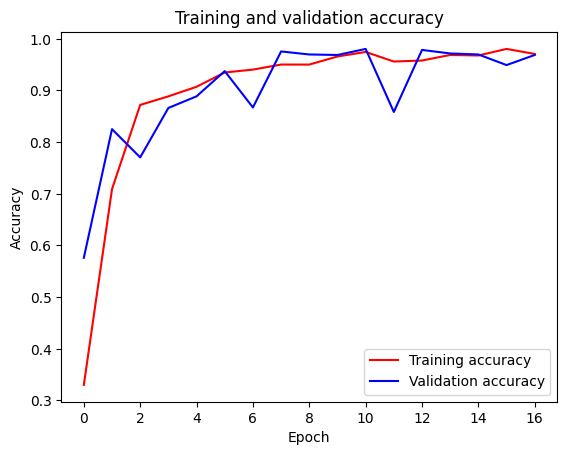

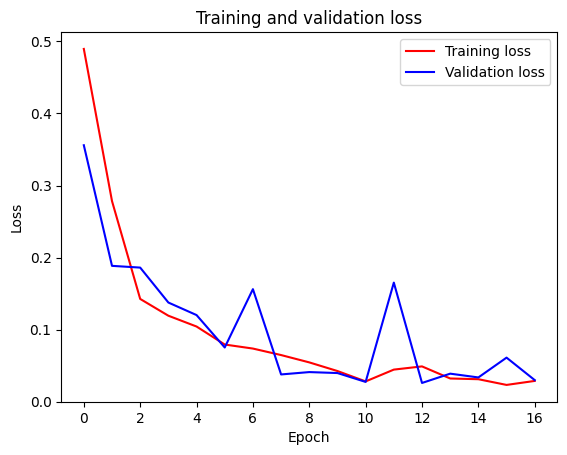

Finally, the trained model is saved in a .h5 file and the model name is saved in a .json file for further use in the user interface.

**Test**

First, the function `load` is defined, which loads the previously trained CNN model.  

Then, the `predict` function then uses the previously loaded model. In order to find the category with the highest probability, the `argmax` function of Numpy is used.

The results obtained are:

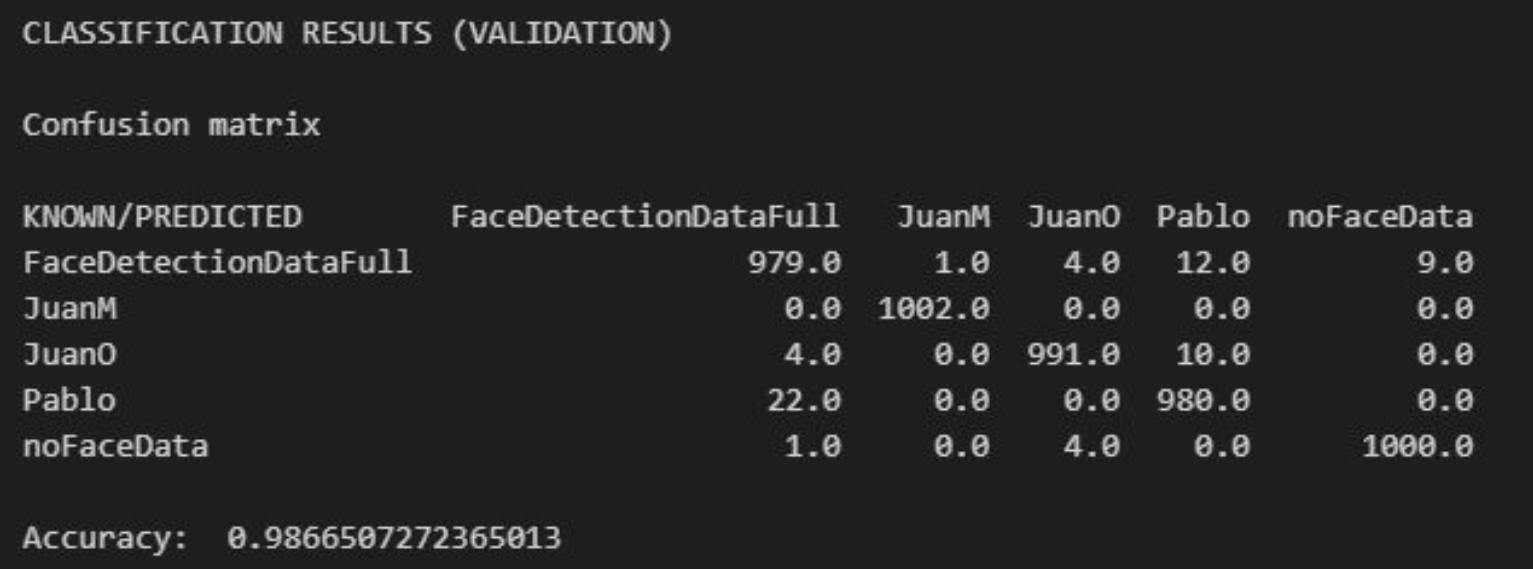

### 5. Final Results

The model is perfoming good as we have seen, for now it detects our faces and classifies them correctly, nevertheless it is true that since the quality of data given as an input for the class of "with face" but not recognizable is based on AI genrated images, that it the class that will need to be improved in the future. The interface result looks like this:

 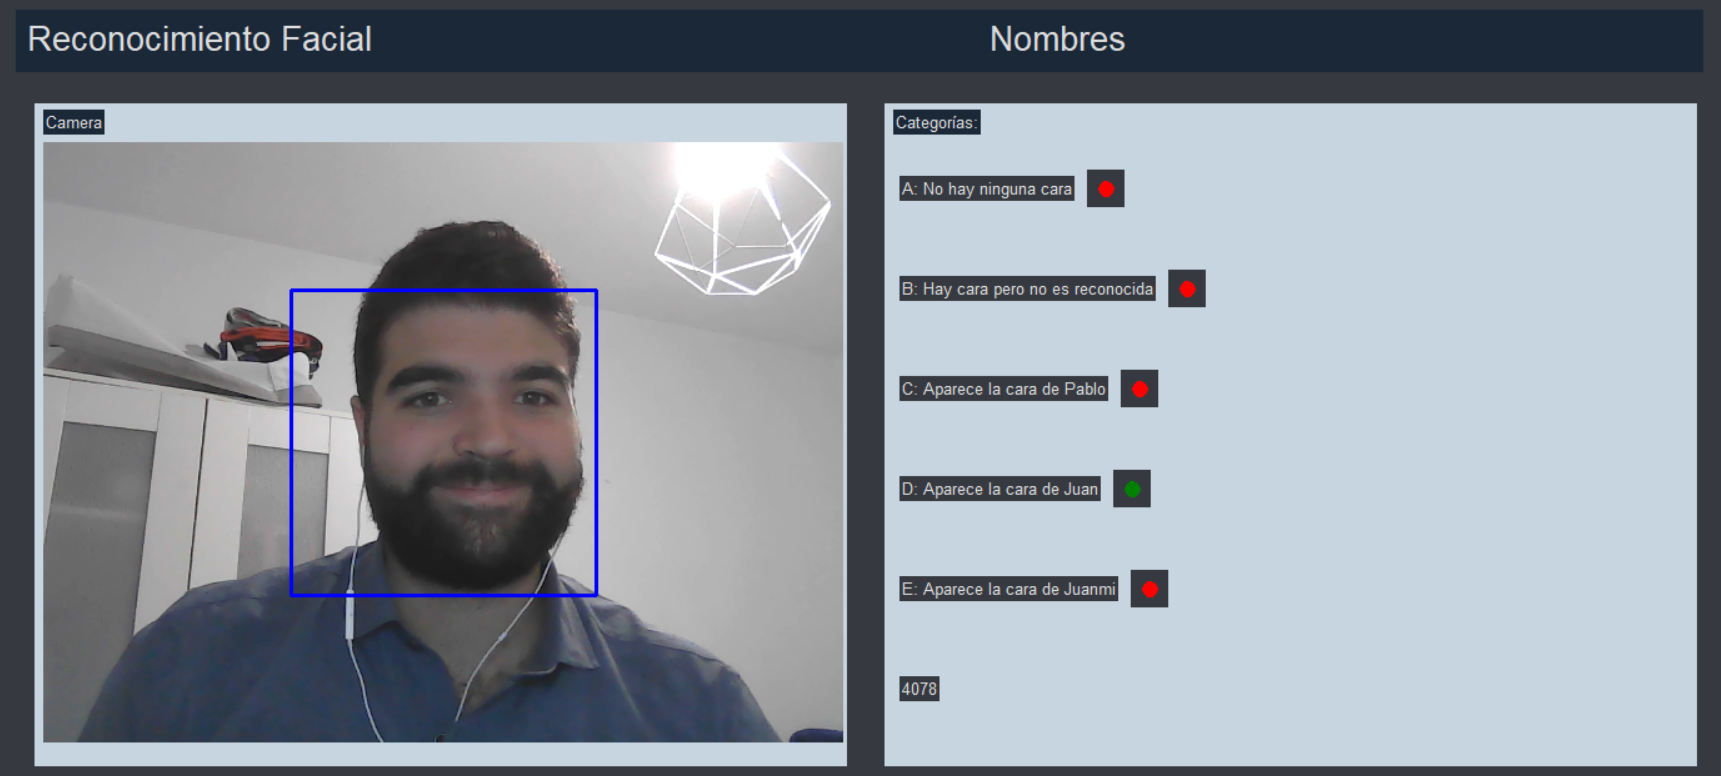

This is a simple model, it can be upgraded easily to improve the interface. In order to check out the application the main script with the agument **--path** as the path of the project's directory ending in our case with **'/FaceDetection'**. 
